# **Supervised Learning - Regression**

In [55]:
# Importing numpy,pandas seaborn, statistics and matplotlib
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt
import statistics as st

In [56]:
# Importing data

data = pd.read_csv('/content/car details v4.csv')
data.head(5)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


# Step 1 :- Checking for duplicates in dataset

In [57]:
# Checking for duplicates in data
print("Count of duplicated data in dataset:-",data.duplicated().sum())
# Here we don't have duplicated data

Count of duplicated data in dataset:- 0


# Step 2:- Handling Missing Values

In [58]:
# Percentage of Missing values
data.isnull().mean()*100

,0
Make,0.000000
Model,0.000000
Price,0.000000
Year,0.000000
Kilometer,0.000000
Fuel Type,0.000000
Transmission,0.000000
Location,0.000000
Color,0.000000
Owner,0.000000


In [59]:
# numericals columns
numerical =data.select_dtypes('number')
numerical.head(4)

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,505000,2017,87150,3990.0,1680.0,1505.0,5.0,35.0
1,450000,2014,75000,3995.0,1695.0,1555.0,5.0,42.0
2,220000,2011,67000,3585.0,1595.0,1550.0,5.0,35.0
3,799000,2019,37500,3995.0,1745.0,1510.0,5.0,37.0


In [60]:
cat=data.select_dtypes('object')

In [61]:
# Extract Power and RPM
numerical[['Power_bhp', 'Power_RPM']] = cat['Max Power'].str.extract(r'(\d+\.?\d*)\s*bhp\s*@\s*(\d+)\s*rpm')
# Convert to numeric
numerical['Power_bhp'] = pd.to_numeric(numerical['Power_bhp'])
numerical['Power_RPM'] = pd.to_numeric(numerical['Power_RPM'])

# Drop original column if necessary
cat = cat.drop('Max Power', axis=1)

In [62]:
# Extract Torque_Nm
numerical[['Torque_Nm', 'Torque_RPM']] = cat['Max Torque'].str.extract(r'(\d+\.?\d*)\s*Nm\s*@\s*(\d+)\s*rpm')
# Convert to numeric
numerical['Torque_Nm'] = pd.to_numeric(numerical['Torque_Nm'])
numerical['Torque_RPM'] = pd.to_numeric(numerical['Torque_RPM'])

# Drop original column if necessary
cat = cat.drop('Max Torque', axis=1)

In [63]:
# Extract Engine
numerical[['Engine']] = cat['Engine'].str.extract(r'(\d+)\s*?cc')
# Convert to numeric
numerical['Engine'] = pd.to_numeric(numerical['Engine'])
numerical['Engine'] = pd.to_numeric(numerical['Engine'])

# Drop original column if necessary
cat = cat.drop('Engine', axis=1)

In [64]:
cat

,Make,Model,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Drivetrain
0,Honda,Amaze 1.2 VX i-VTEC,Petrol,Manual,Pune,Grey,First,Corporate,FWD
1,Maruti Suzuki,Swift DZire VDI,Diesel,Manual,Ludhiana,White,Second,Individual,FWD
2,Hyundai,i10 Magna 1.2 Kappa2,Petrol,Manual,Lucknow,Maroon,First,Individual,FWD
3,Toyota,Glanza G,Petrol,Manual,Mangalore,Red,First,Individual,FWD
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],Diesel,Manual,Mumbai,Grey,First,Individual,RWD
...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],Diesel,Manual,Surat,White,First,Individual,FWD
2055,Hyundai,Eon D-Lite +,Petrol,Manual,Ahmedabad,White,Second,Individual,FWD
2056,Ford,Figo Duratec Petrol ZXI 1.2,Petrol,Manual,Thane,Silver,First,Individual,FWD
2057,BMW,5-Series 520d Luxury Line [2017-2019],Diesel,Automatic,Coimbatore,White,First,Individual,RWD


In [65]:
# numericals columns
numerical.head(4)

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Power_bhp,Power_RPM,Torque_Nm,Torque_RPM,Engine
0,505000,2017,87150,3990.0,1680.0,1505.0,5.0,35.0,87.0,6000.0,109.0000,4500.0,1198.0
1,450000,2014,75000,3995.0,1695.0,1555.0,5.0,42.0,74.0,4000.0,190.0000,2000.0,1248.0
2,220000,2011,67000,3585.0,1595.0,1550.0,5.0,35.0,79.0,6000.0,112.7619,4000.0,1197.0
3,799000,2019,37500,3995.0,1745.0,1510.0,5.0,37.0,82.0,6000.0,113.0000,4200.0,1197.0


In [66]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               2059 non-null   int64  
 1   Year                2059 non-null   int64  
 2   Kilometer           2059 non-null   int64  
 3   Length              1995 non-null   float64
 4   Width               1995 non-null   float64
 5   Height              1995 non-null   float64
 6   Seating Capacity    1995 non-null   float64
 7   Fuel Tank Capacity  1946 non-null   float64
 8   Power_bhp           1847 non-null   float64
 9   Power_RPM           1847 non-null   float64
 10  Torque_Nm           1851 non-null   float64
 11  Torque_RPM          1851 non-null   float64
 12  Engine              1979 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 209.2 KB


In [67]:
round(numerical.describe())

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Power_bhp,Power_RPM,Torque_Nm,Torque_RPM,Engine
count,2059.0,2059.0,2059.0,1995.0,1995.0,1995.0,1995.0,1946.0,1847.0,1847.0,1851.0,1851.0,1979.0
mean,1702992.0,2016.0,54225.0,4281.0,1768.0,1592.0,5.0,52.0,131.0,4808.0,250.0,2592.0,1693.0
std,2419881.0,3.0,57362.0,442.0,135.0,136.0,1.0,15.0,66.0,1096.0,141.0,1207.0,644.0
min,49000.0,1988.0,0.0,3099.0,1475.0,1165.0,2.0,15.0,39.0,2910.0,54.0,150.0,624.0
25%,484999.0,2014.0,29000.0,3985.0,1695.0,1485.0,5.0,41.0,83.0,4000.0,115.0,1600.0,1197.0
50%,825000.0,2017.0,50000.0,4370.0,1770.0,1545.0,5.0,50.0,117.0,4200.0,204.0,1800.0,1498.0
75%,1925000.0,2019.0,72000.0,4629.0,1832.0,1675.0,5.0,60.0,174.0,6000.0,350.0,4000.0,1995.0
max,35000000.0,2022.0,2000000.0,5569.0,2220.0,1995.0,8.0,105.0,660.0,8250.0,780.0,6500.0,6592.0


In [68]:
# handling missing values in numerical column
numerical['Length'].fillna(st.median(numerical['Length']),inplace=True)
numerical['Width'].fillna(st.median(numerical['Width']),inplace=True)
numerical['Height'].fillna(numerical['Height'].median(),inplace=True)
numerical['Seating Capacity'].fillna(st.median(numerical['Seating Capacity']),inplace=True)
numerical['Fuel Tank Capacity'].fillna(st.median(numerical['Fuel Tank Capacity']),inplace=True)
numerical['Fuel Tank Capacity'].fillna(st.median(numerical['Fuel Tank Capacity']),inplace=True)
numerical['Power_RPM'].fillna(st.median(numerical['Power_RPM']),inplace=True)
numerical['Power_bhp'].fillna(st.median(numerical['Power_bhp']),inplace=True)
numerical['Torque_Nm'].fillna(st.median(numerical['Torque_Nm']),inplace=True)
numerical['Torque_RPM'].fillna(st.median(numerical['Torque_RPM']),inplace=True)
numerical['Engine'].fillna(st.median(numerical['Engine']),inplace=True)

/tmp/ipython-input-2327274092.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  numerical['Length'].fillna(st.median(numerical['Length']),inplace=True)
/tmp/ipython-input-2327274092.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

In [69]:
numerical.isnull().mean()*100

,0
Price,0.0
Year,0.0
Kilometer,0.0
Length,0.0
Width,0.0
Height,0.0
Seating Capacity,0.0
Fuel Tank Capacity,0.0
Power_bhp,0.0
Power_RPM,0.0


In [70]:
# handling missing value in cat column
cat['Drivetrain'].fillna(st.mode(cat['Drivetrain']),inplace= True)

/tmp/ipython-input-255672524.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cat['Drivetrain'].fillna(st.mode(cat['Drivetrain']),inplace= True)


In [71]:
cat.isnull().mean()*100

,0
Make,0.0
Model,0.0
Fuel Type,0.0
Transmission,0.0
Location,0.0
Color,0.0
Owner,0.0
Seller Type,0.0
Drivetrain,0.0


In [72]:
cat

,Make,Model,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Drivetrain
0,Honda,Amaze 1.2 VX i-VTEC,Petrol,Manual,Pune,Grey,First,Corporate,FWD
1,Maruti Suzuki,Swift DZire VDI,Diesel,Manual,Ludhiana,White,Second,Individual,FWD
2,Hyundai,i10 Magna 1.2 Kappa2,Petrol,Manual,Lucknow,Maroon,First,Individual,FWD
3,Toyota,Glanza G,Petrol,Manual,Mangalore,Red,First,Individual,FWD
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],Diesel,Manual,Mumbai,Grey,First,Individual,RWD
...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],Diesel,Manual,Surat,White,First,Individual,FWD
2055,Hyundai,Eon D-Lite +,Petrol,Manual,Ahmedabad,White,Second,Individual,FWD
2056,Ford,Figo Duratec Petrol ZXI 1.2,Petrol,Manual,Thane,Silver,First,Individual,FWD
2057,BMW,5-Series 520d Luxury Line [2017-2019],Diesel,Automatic,Coimbatore,White,First,Individual,RWD


In [73]:
numerical

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Power_bhp,Power_RPM,Torque_Nm,Torque_RPM,Engine
0,505000,2017,87150,3990.0,1680.0,1505.0,5.0,35.0,87.0,6000.0,109.0000,4500.0,1198.0
1,450000,2014,75000,3995.0,1695.0,1555.0,5.0,42.0,74.0,4000.0,190.0000,2000.0,1248.0
2,220000,2011,67000,3585.0,1595.0,1550.0,5.0,35.0,79.0,6000.0,112.7619,4000.0,1197.0
3,799000,2019,37500,3995.0,1745.0,1510.0,5.0,37.0,82.0,6000.0,113.0000,4200.0,1197.0
4,1950000,2018,69000,4735.0,1830.0,1795.0,7.0,55.0,148.0,3400.0,343.0000,1400.0,2393.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,850000,2016,90300,4585.0,1890.0,1785.0,7.0,70.0,138.0,3750.0,330.0000,1600.0,2179.0
2055,275000,2014,83000,3495.0,1550.0,1500.0,5.0,32.0,55.0,5500.0,75.0000,4000.0,814.0
2056,240000,2013,73000,3795.0,1680.0,1427.0,5.0,45.0,70.0,6250.0,102.0000,4000.0,1196.0
2057,4290000,2018,60474,4936.0,1868.0,1479.0,5.0,65.0,188.0,4000.0,400.0000,1750.0,1995.0


# Step 4:- handling outliers

In [74]:
# Checking the skewness
numerical.skew()

,0
Price,4.965143
Year,-0.840685
Kilometer,20.980719
Length,-0.026307
Width,0.269971
Height,0.877625
Seating Capacity,1.515381
Fuel Tank Capacity,0.841414
Power_bhp,1.809494
Power_RPM,0.202305


In [75]:
round(numerical.describe())

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Power_bhp,Power_RPM,Torque_Nm,Torque_RPM,Engine
count,2059.0,2059.0,2059.0,2059.0,2059.0,2059.0,2059.0,2059.0,2059.0,2059.0,2059.0,2059.0,2059.0
mean,1702992.0,2016.0,54225.0,4305.0,1770.0,1590.0,5.0,52.0,136.0,4828.0,261.0,2683.0,1673.0
std,2419881.0,3.0,57362.0,456.0,134.0,134.0,1.0,15.0,64.0,1039.0,138.0,1177.0,638.0
min,49000.0,1988.0,0.0,3099.0,1475.0,1165.0,2.0,15.0,39.0,2910.0,54.0,150.0,624.0
25%,484999.0,2014.0,29000.0,3986.0,1695.0,1485.0,5.0,42.0,85.0,4000.0,136.0,1600.0,1198.0
50%,825000.0,2017.0,50000.0,4375.0,1777.0,1545.0,5.0,50.0,121.0,5000.0,250.0,2000.0,1497.0
75%,1925000.0,2019.0,72000.0,4656.0,1831.0,1672.0,5.0,60.0,184.0,6000.0,360.0,4000.0,1995.0
max,35000000.0,2022.0,2000000.0,5569.0,2220.0,1995.0,8.0,105.0,660.0,8250.0,780.0,6500.0,6592.0


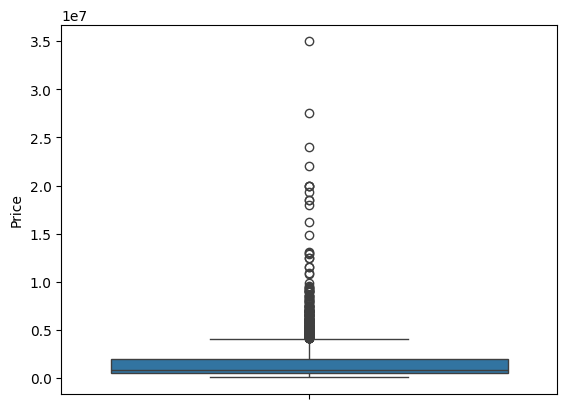

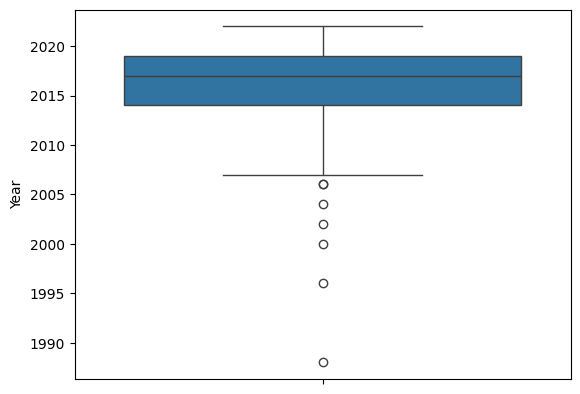

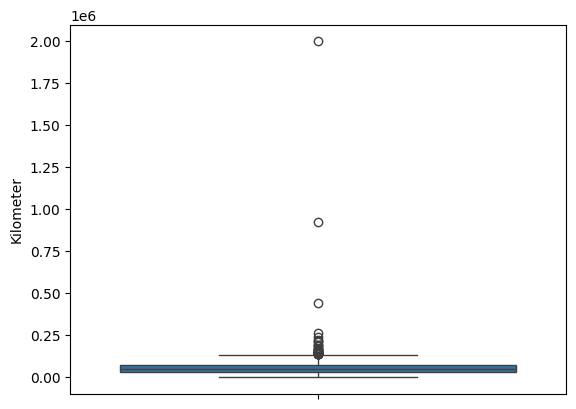

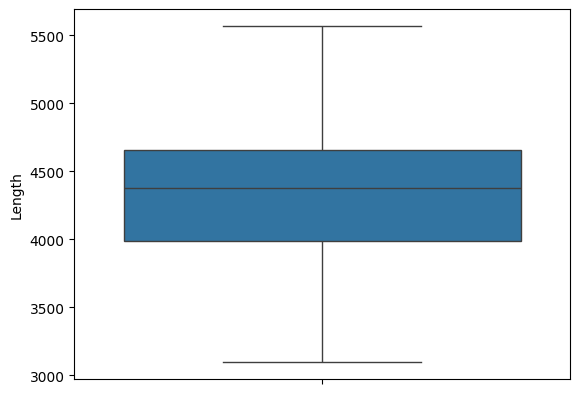

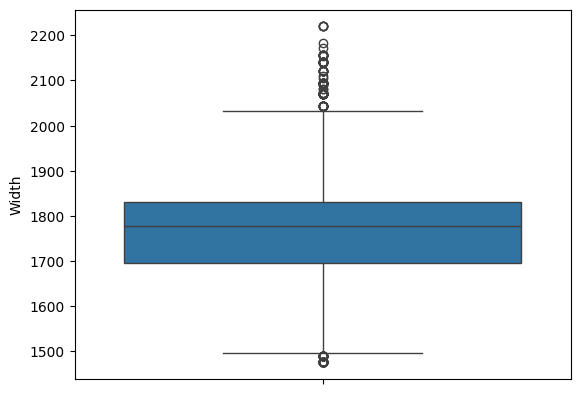

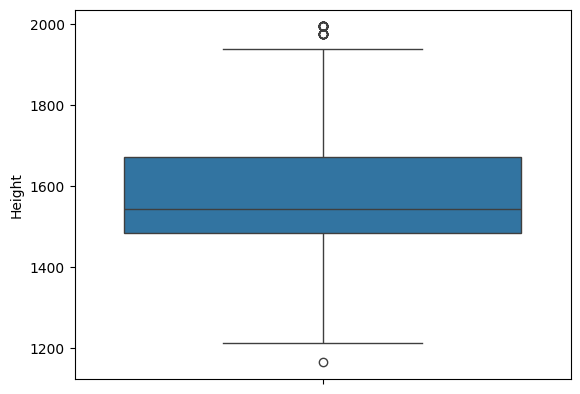

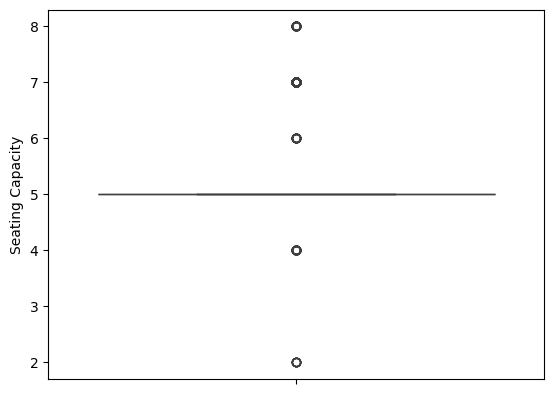

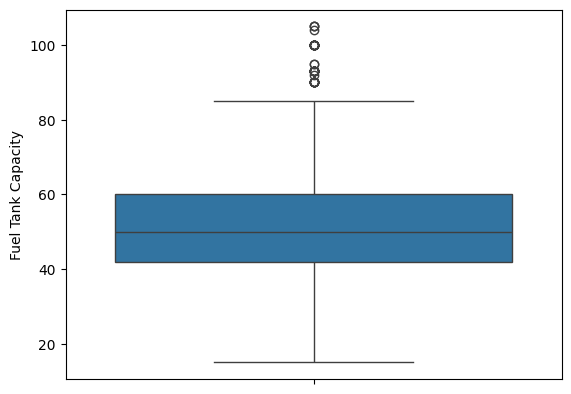

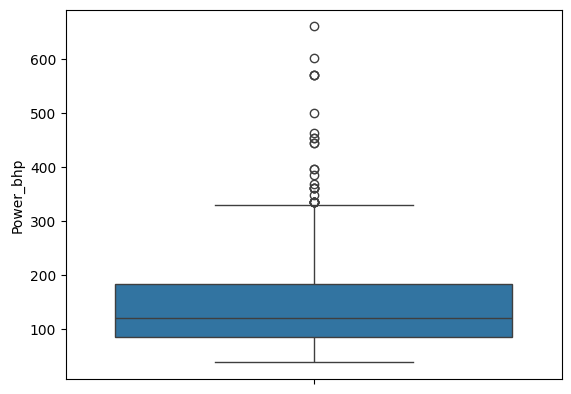

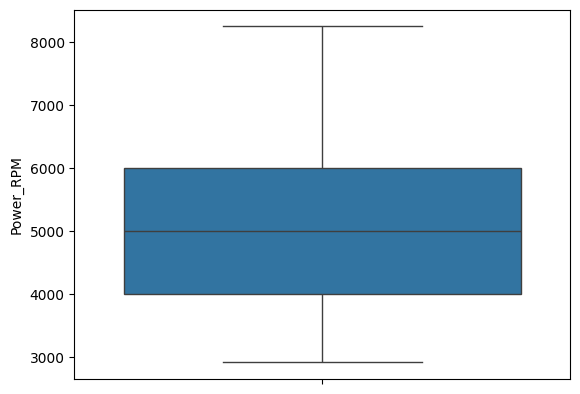

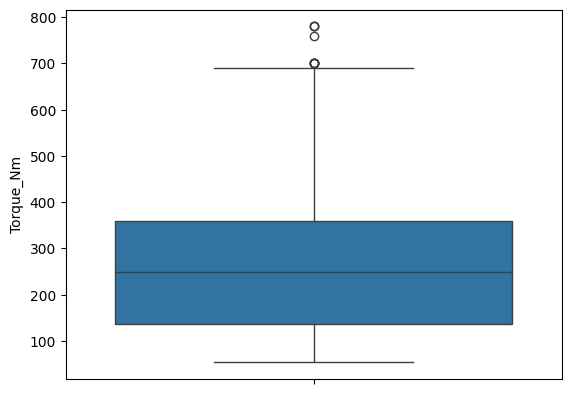

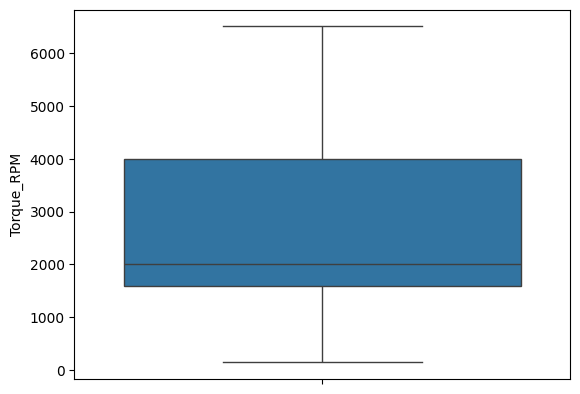

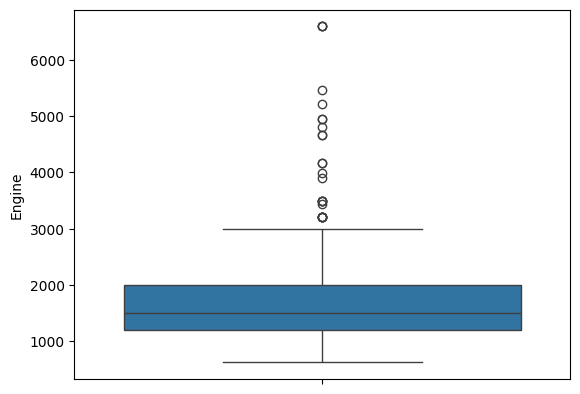

In [76]:
for i in numerical:
    sea.boxplot(numerical[i])
    plt.show()

In [77]:
Q1 = numerical['Kilometer'].quantile(0.25)
Q3 = numerical['Kilometer'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

numerical['Kilometer']= numerical['Kilometer'].clip(lower_bound,upper_bound)

In [78]:
Q1 = numerical['Width'].quantile(0.25)
Q3 = numerical['Width'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

numerical['Width']= numerical['Width'].clip(lower_bound,upper_bound)

In [79]:
Q1 = numerical['Height'].quantile(0.25)
Q3 = numerical['Height'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

numerical['Height']= numerical['Height'].clip(lower_bound,upper_bound)

In [80]:
Q1 = numerical['Seating Capacity'].quantile(0.25)
Q3 = numerical['Seating Capacity'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

numerical['Seating Capacity']= numerical['Seating Capacity'].clip(lower_bound,upper_bound)

In [81]:
Q1 = numerical['Fuel Tank Capacity'].quantile(0.25)
Q3 = numerical['Fuel Tank Capacity'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

numerical['Fuel Tank Capacity']= numerical['Fuel Tank Capacity'].clip(lower_bound,upper_bound)

In [82]:
Q1 = numerical['Power_bhp'].quantile(0.25)
Q3 = numerical['Power_bhp'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

numerical['Power_bhp']= numerical['Power_bhp'].clip(lower_bound,upper_bound)

In [83]:
Q1 = numerical['Power_RPM'].quantile(0.25)
Q3 = numerical['Power_RPM'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

numerical['Power_RPM']= numerical['Power_RPM'].clip(lower_bound,upper_bound)

In [84]:
Q1 = numerical['Torque_Nm'].quantile(0.25)
Q3 = numerical['Torque_Nm'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

numerical['Torque_Nm']= numerical['Torque_Nm'].clip(lower_bound,upper_bound)

In [85]:
Q1 = numerical['Engine'].quantile(0.25)
Q3 = numerical['Engine'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

numerical['Engine']= numerical['Engine'].clip(lower_bound,upper_bound)

Haven't removed outliers from price since it is our target and Year column,we will do transformation for these two columns

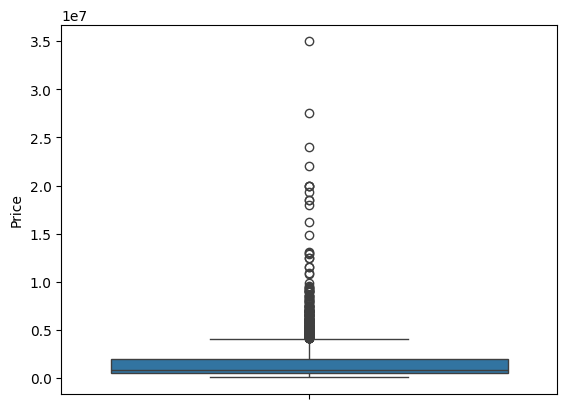

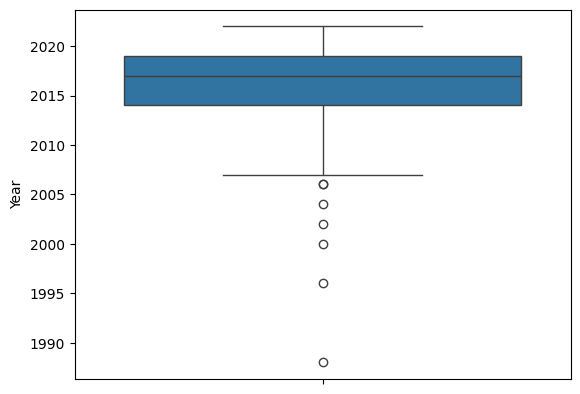

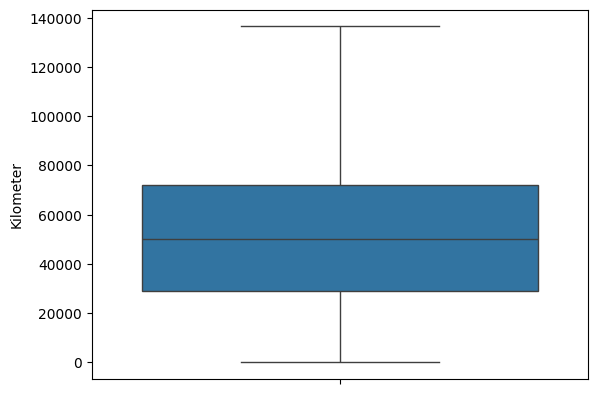

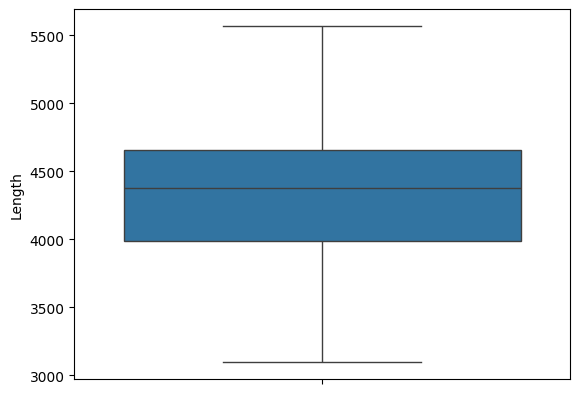

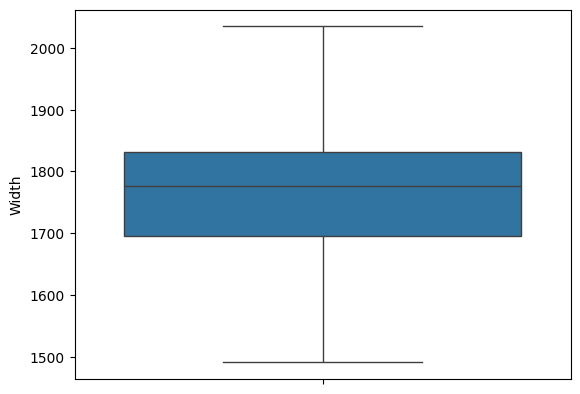

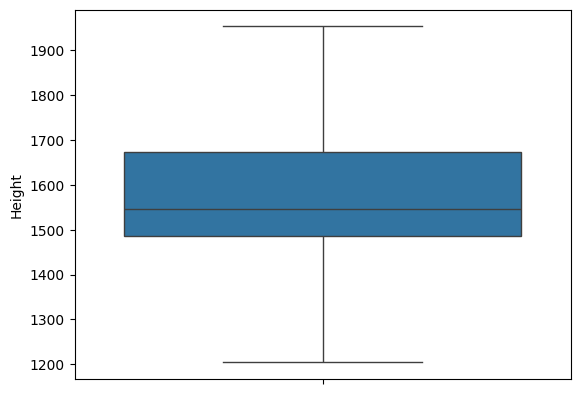

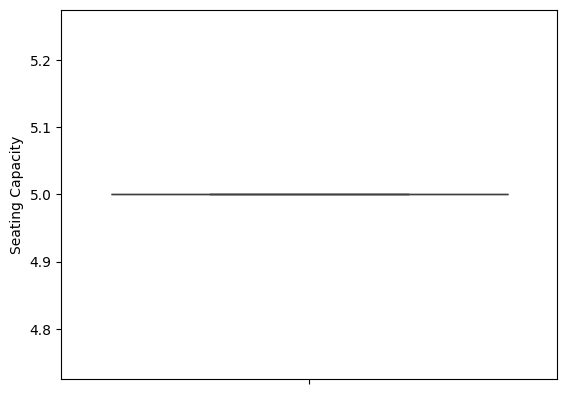

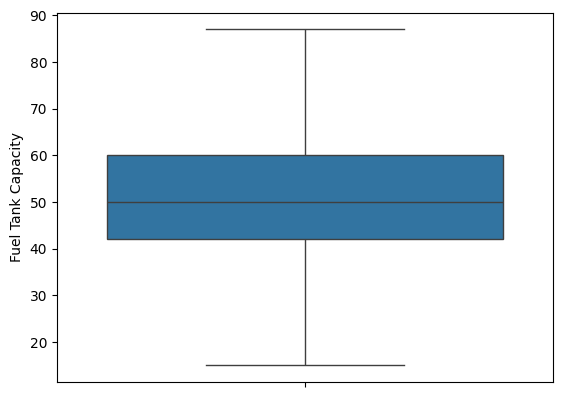

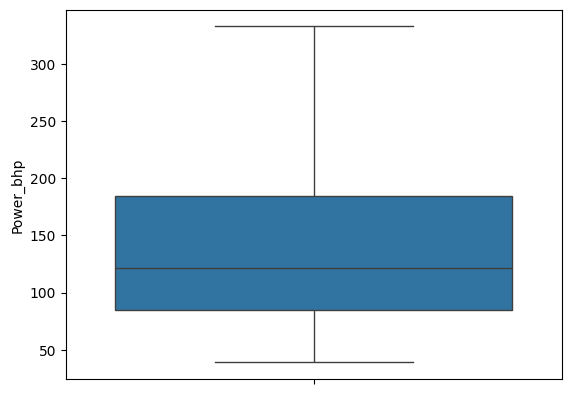

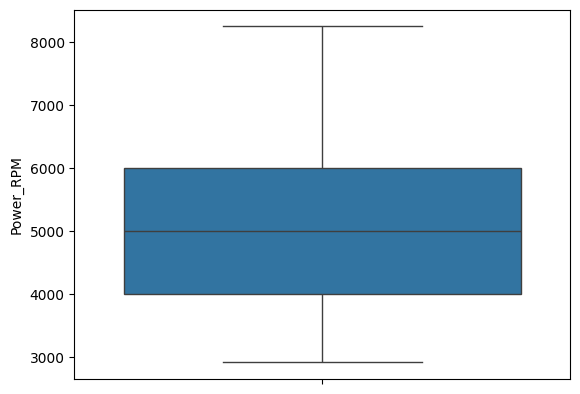

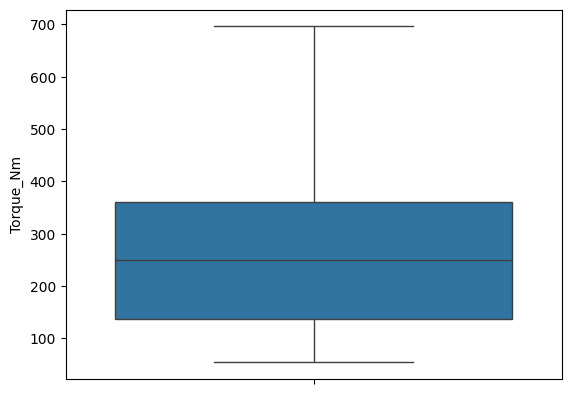

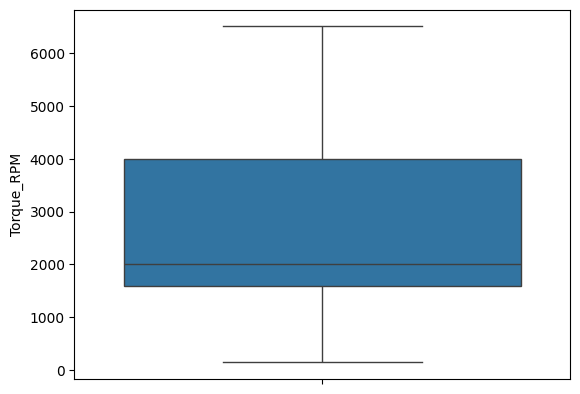

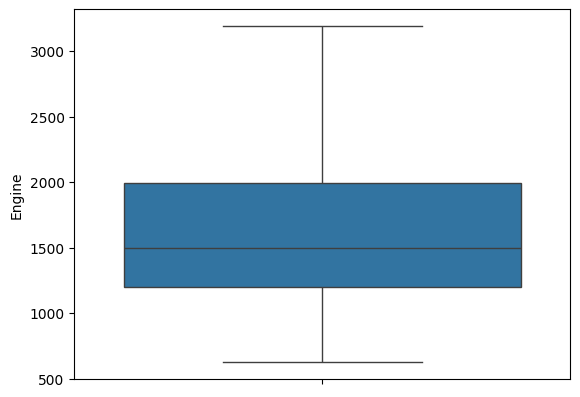

In [86]:
for i in numerical:
    sea.boxplot(numerical[i])
    plt.show()

In [87]:
numerical.skew()

,0
Price,4.965143
Year,-0.840685
Kilometer,0.525823
Length,-0.026307
Width,-0.088777
Height,0.826382
Seating Capacity,0.000000
Fuel Tank Capacity,0.631219
Power_bhp,0.843448
Power_RPM,0.202305


In [88]:
# We haven't done outliner clipping for Price since it is a traget, so now we can do transformation to 'Price' and 'Year'

In [89]:
numerical['Price']=np.log1p(numerical['Price'])
numerical['Year']= np.cbrt(numerical['Year'])
numerical['Height']=np.cbrt(numerical['Height'])
numerical['Fuel Tank Capacity'] = np.cbrt(numerical['Fuel Tank Capacity'])
numerical['Power_bhp']= np.cbrt(numerical['Power_bhp'])
numerical['Torque_Nm']= np.cbrt(numerical['Torque_Nm'])
numerical['Torque_RPM']= np.cbrt(numerical['Torque_RPM'])
numerical['Engine']= np.cbrt(numerical['Engine'])

In [90]:
numerical.skew()

,0
Price,0.485862
Year,-0.847763
Kilometer,0.525823
Length,-0.026307
Width,-0.088777
Height,0.725877
Seating Capacity,0.000000
Fuel Tank Capacity,0.280398
Power_bhp,0.256768
Power_RPM,0.202305


# Step 5:- Encoding and Scailing

In [91]:
cat = cat.drop(['Model','Color'],axis=1)
cat

,Make,Fuel Type,Transmission,Location,Owner,Seller Type,Drivetrain
0,Honda,Petrol,Manual,Pune,First,Corporate,FWD
1,Maruti Suzuki,Diesel,Manual,Ludhiana,Second,Individual,FWD
2,Hyundai,Petrol,Manual,Lucknow,First,Individual,FWD
3,Toyota,Petrol,Manual,Mangalore,First,Individual,FWD
4,Toyota,Diesel,Manual,Mumbai,First,Individual,RWD
...,...,...,...,...,...,...,...
2054,Mahindra,Diesel,Manual,Surat,First,Individual,FWD
2055,Hyundai,Petrol,Manual,Ahmedabad,Second,Individual,FWD
2056,Ford,Petrol,Manual,Thane,First,Individual,FWD
2057,BMW,Diesel,Automatic,Coimbatore,First,Individual,RWD


In [92]:
X=pd.concat([numerical,cat], axis=1)

In [93]:
Y=X['Price']
Y

,Price
0,13.132316
1,13.017005
2,12.301387
3,13.591117
4,14.483340
...,...
2054,13.652993
2055,12.524530
2056,12.388398
2057,15.271798


In [95]:
X= X.drop(['Price','Year','Make','Location'], axis=1)
X

,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Power_bhp,Power_RPM,Torque_Nm,Torque_RPM,Engine,Fuel Type,Transmission,Owner,Seller Type,Drivetrain
0,87150,3990.0,1680.0,11.459847,5.0,3.271066,4.431048,6000.0,4.776856,16.509636,10.620679,Petrol,Manual,First,Corporate,FWD
1,75000,3995.0,1695.0,11.585376,5.0,3.476027,4.198336,4000.0,5.748897,12.599210,10.766425,Diesel,Manual,Second,Individual,FWD
2,67000,3585.0,1595.0,11.572945,5.0,3.271066,4.290840,6000.0,4.831190,15.874011,10.617723,Petrol,Manual,First,Individual,FWD
3,37500,3995.0,1745.0,11.472524,5.0,3.332222,4.344481,6000.0,4.834588,16.134286,10.617723,Petrol,Manual,First,Individual,FWD
4,69000,4735.0,1830.0,12.153130,5.0,3.802952,5.289572,3400.0,7.000000,11.186889,13.375630,Diesel,Manual,First,Individual,RWD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,90300,4585.0,1890.0,12.130520,5.0,4.121285,5.167649,3750.0,6.910423,11.696071,12.964400,Diesel,Manual,First,Individual,FWD
2055,83000,3495.0,1550.0,11.447142,5.0,3.174802,3.802952,5500.0,4.217163,15.874011,9.337017,Petrol,Manual,Second,Individual,FWD
2056,73000,3795.0,1680.0,11.258348,5.0,3.556893,4.121285,6250.0,4.672329,15.874011,10.614765,Petrol,Manual,First,Individual,FWD
2057,60474,4936.0,1868.0,11.393471,5.0,4.020726,5.728654,4000.0,7.368063,12.050711,12.588702,Diesel,Automatic,First,Individual,RWD


In [96]:
# target encoding to 'Fuel Type' and 'Owner' since these columns have more cardinality
X['Fuel Type'].value_counts()

Fuel_target_mean = X.groupby('Fuel Type')['Engine'].mean() #.333333
# Map City to mean value
X['Fuel Type'] = X['Fuel Type'].map(Fuel_target_mean)

owner_target_mean = X.groupby('Owner')['Seating Capacity'].mean() #.333333
# Map City to mean value
X['Owner'] = X['Owner'].map(owner_target_mean)

In [97]:
cat_column = X.select_dtypes('object').columns

In [98]:
cat_column

Index(['Transmission', 'Seller Type', 'Drivetrain'], dtype='object')

In [99]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)  # sparse=False forces dense output
X_cat = ohe.fit_transform(X[cat_column])
#Here we are creating a table that' swhy to get all column name we have given get_feature_names_out(cat_column)
X_cat = pd.DataFrame(X_cat, columns=ohe.get_feature_names_out(cat_column), index=X.index)

In [100]:
X_cat

,Transmission_Manual,Seller Type_Corporate,Seller Type_Individual,Drivetrain_FWD,Drivetrain_RWD
0,1.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,1.0,0.0
2,1.0,0.0,1.0,1.0,0.0
3,1.0,0.0,1.0,1.0,0.0
4,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...
2054,1.0,0.0,1.0,1.0,0.0
2055,1.0,0.0,1.0,1.0,0.0
2056,1.0,0.0,1.0,1.0,0.0
2057,0.0,0.0,1.0,0.0,1.0


In [101]:
Num_col= X.select_dtypes('number').columns
Num_col

Index(['Kilometer', 'Length', 'Width', 'Height', 'Seating Capacity',
       'Fuel Tank Capacity', 'Power_bhp', 'Power_RPM', 'Torque_Nm',
       'Torque_RPM', 'Engine', 'Fuel Type', 'Owner'],
      dtype='object')

In [102]:
# Combine with numerical columns
X_final = pd.concat([X[Num_col], X_cat], axis=1)

X_final.head()

,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Power_bhp,Power_RPM,Torque_Nm,Torque_RPM,Engine,Fuel Type,Owner,Transmission_Manual,Seller Type_Corporate,Seller Type_Individual,Drivetrain_FWD,Drivetrain_RWD
0,87150,3990.0,1680.0,11.459847,5.0,3.271066,4.431048,6000.0,4.776856,16.509636,10.620679,11.054182,5.0,1.0,1.0,0.0,1.0,0.0
1,75000,3995.0,1695.0,11.585376,5.0,3.476027,4.198336,4000.0,5.748897,12.599210,10.766425,12.354208,5.0,1.0,0.0,1.0,1.0,0.0
2,67000,3585.0,1595.0,11.572945,5.0,3.271066,4.290840,6000.0,4.831190,15.874011,10.617723,11.054182,5.0,1.0,0.0,1.0,1.0,0.0
3,37500,3995.0,1745.0,11.472524,5.0,3.332222,4.344481,6000.0,4.834588,16.134286,10.617723,11.054182,5.0,1.0,0.0,1.0,1.0,0.0
4,69000,4735.0,1830.0,12.153130,5.0,3.802952,5.289572,3400.0,7.000000,11.186889,13.375630,12.354208,5.0,1.0,0.0,1.0,0.0,1.0


In [103]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_final[Num_col] = scaler.fit_transform(X[Num_col])

In [104]:
X_final

,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Power_bhp,Power_RPM,Torque_Nm,Torque_RPM,Engine,Fuel Type,Owner,Transmission_Manual,Seller Type_Corporate,Seller Type_Individual,Drivetrain_FWD,Drivetrain_RWD
0,1.154298,-0.691144,-0.699640,-0.636259,0.0,-1.300514,-0.827688,1.127736,-1.225541,1.435477,-0.812571,-0.907487,0.0,1.0,1.0,0.0,1.0,0.0
1,0.751534,-0.680168,-0.578746,-0.241901,0.0,-0.681829,-1.149110,-0.796814,-0.377220,-0.491723,-0.701936,0.944723,0.0,1.0,0.0,1.0,1.0,0.0
2,0.486339,-1.580238,-1.384707,-0.280953,0.0,-1.300514,-1.021343,1.127736,-1.178123,1.122218,-0.814815,-0.907487,0.0,1.0,0.0,1.0,1.0,0.0
3,-0.491566,-0.680168,-0.175765,-0.596434,0.0,-1.115912,-0.947253,1.127736,-1.175157,1.250491,-0.814815,-0.907487,0.0,1.0,0.0,1.0,1.0,0.0
4,0.552638,0.944349,0.509302,1.541747,0.0,0.305017,0.358111,-1.374180,0.714644,-1.187766,1.278696,0.944723,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,1.258719,0.615055,0.992879,1.470714,0.0,1.265924,0.189710,-1.037383,0.636468,-0.936823,0.966534,0.944723,0.0,1.0,0.0,1.0,1.0,0.0
2055,1.016729,-1.777814,-1.747390,-0.676173,0.0,-1.591094,-1.695216,0.646599,-1.713997,1.122218,-1.786992,-0.907487,0.0,1.0,0.0,1.0,1.0,0.0
2056,0.685235,-1.119226,-0.699640,-1.269287,0.0,-0.437728,-1.255533,1.368305,-1.316765,1.122218,-0.817060,-0.907487,0.0,1.0,0.0,1.0,1.0,0.0
2057,0.270007,1.385603,0.815567,-0.844786,0.0,0.962379,0.964573,-0.796814,1.035861,-0.762043,0.681344,0.944723,0.0,0.0,0.0,1.0,0.0,1.0


# Step 6:- Machine learning

In [105]:
from sklearn.model_selection import train_test_split #for train data split
from sklearn.preprocessing import  PolynomialFeatures #For polynomial regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso #For linear regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X_final, Y, test_size=0.2, random_state=42)

In [107]:
X_train.shape

(1647, 18)

# linear regression

In [108]:
lin_model = LinearRegression()# multiple linear regression
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)

print("Linear Regression Metrics:")
print("R2:", r2_score(y_test, y_pred_lin))
print("MAE:", mean_absolute_error(y_test, y_pred_lin))
print("MSE:", mean_squared_error(y_test, y_pred_lin))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lin)))

Linear Regression Metrics:
R2: 0.8162577069315256
MAE: 0.3171559591977268
MSE: 0.1731726483795023
RMSE: 0.4161401787613187


For Linear regression:-

r2_score is 81%

MAE: 0.31%,

MSE: 0.17%,

RMSE: 0.41%

Error is comparitively low

# 2. Polynomial Regression (Degree 2)

In [109]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

print("\nPolynomial Regression Metrics:")
print("R2:", r2_score(y_test, y_pred_poly))
print("MAE:", mean_absolute_error(y_test, y_pred_poly))
print("MSE:", mean_squared_error(y_test, y_pred_poly))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_poly)))


Polynomial Regression Metrics:
R2: 0.8778388482352105
MAE: 0.25854828844584044
MSE: 0.11513391841863631
RMSE: 0.339313893642209


For Polynomial, we have:-

r2_score :- 87%

MAE: 0.25854828844584044

MSE: 0.11513391841863631

RMSE: 0.339313893642209

Errors are comparatively low

Between Linear and Polynomial Regression Polynomial is a better model